# Basic Regression

For this, we'll do a simple linear regression as described [on this Wikipedia page](https://en.wikipedia.org/wiki/Simple_linear_regression), creating a line of best fit through a series of points.

## Creating your virtual environment

We'll install packages locally to the folder you're doing these exercises. This avoids conflicts with PC priveleges and To do this, let's create a virtual environment. The following commands will be run assuming you are using a Windows machine.

Run the following from a terminal:

```
py -m venv lab
```

A virtual environment should be created in your directory. Look for a folder named `lab`. See what's inside. Look in the windows explorer, or type the following to see the contents:

```
tree lab
```

Inside a directory called `Scripts`, there is an `activate` file. In terminal, type the file: `lab\Scripts\activate`. Now, your virtual environment is activated, as indicated with the text `(lab)` at the front of the terminal entry line.

## Manually Calculating the Linear Regression

To get familiar with some python basics, we will manually perform a linear regression in R. Following sections will take advantage of existing libraries to do the leg-work for you.

For this, we'll use `numpy`. Numpy is one of the most common python scientific packages. It includes a multi-dimensional array and some high-
performance functions and operations on those arrays. I'd highly recommend viewing [their documentation](https://numpy.org/doc/stable/) to get a more-complete understanding. At the very least, go through [their absolute beginners tutorial](https://numpy.org/doc/stable/user/absolute_beginners.html) if you're starting from scratch.

We start by importing it. Because it is such a common library, it is convention to shorten the name with the `as` keyword. From there, we can access all its objects and functions with `np.` as seen below.

In [1]:
import numpy as np # for performing arithmetic on homogeneous arrays

x = np.array([1,4,9,4,5])
y = np.array([2,4,5,3,5])

xy = np.array([x, y]).transpose() # transpose not necessary, but it places the columns as you'd see your data elsewhere
print(f"  x y\n{xy}")

  x y
[[1 2]
 [4 4]
 [9 5]
 [4 3]
 [5 5]]



We can now take this array and use it going forward to find the mean on each column, using the same `numpy` library. Basic arithmetic of numpy arrays will be performed element-by-element, given that they are the same dimension. When not the same dimension, `numpy` will try to [broadcast](https://numpy.org/doc/stable/user/basics.broadcasting.html) the dimensions to perform element-wise arithmetic.

In [2]:
xy_mean = xy.mean(axis=0)
print(f"Mean of x {xy_mean[0]} and mean of y {xy_mean[1]}")
xy_dev = xy - xy_mean
print(f"Deviations (or least squares residuals) of x and y from its mean:\n  xdev ydev\n{xy_dev}")

Mean of x 4.6 and mean of y 3.8
Deviations (or least squares residuals) of x and y from its mean:
  xdev ydev
[[-3.6 -1.8]
 [-0.6  0.2]
 [ 4.4  1.2]
 [-0.6 -0.8]
 [ 0.4  1.2]]


In [3]:
regression_slope = np.sum(xy_dev[:,0] * xy_dev[:,1]) / np.sum(xy_dev[:,0]**2)
print(f"slope = {regression_slope}")
regression_intercept = xy_mean[1] - regression_slope * xy_mean[0]
print(f"intercept = {regression_intercept}")

print(f"In the form y = a + bx, we have:\n  y = {regression_intercept:.2f} + {regression_slope:.2f}x")

slope = 0.3795180722891566
intercept = 2.0542168674698793
In the form y = a + bx, we have:
  y = 2.05 + 0.38x


### Plotting

We'll create a function to plot the points and best fit line, so that we can call it throughout this notebook. To do this, we'll use `matplotlib`: see [documentation here](https://matplotlib.org/stable/api/index).

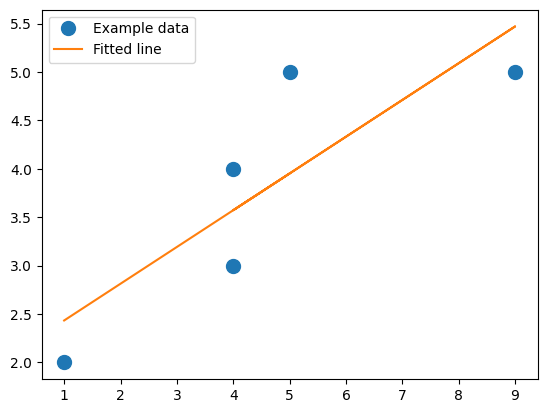

In [4]:
import matplotlib.pyplot as plt

def plot_best_fit(x, y, slope, intercept):
    plt.plot(x,y, 'o', label="Example data", markersize=10)
    plt.plot(x, slope * x + intercept, label="Fitted line")
    plt.legend()
    plt.show()
    
plot_best_fit(x,y, regression_slope, regression_intercept)

### Finding Sum of Squared values and R-squared

We will calculate the following 3 sum of square values:

1. Sum of Squares Total -- SST
2. Sum of Squares Regression -- SSR
3. Sum of Squares Estimate of Errors -- SSE

The equations are as follows

$$
SST = \sum (y_i - \bar{y}) \\
SSR = \sum (\hat{y}_i – \bar{y})^2 \\
SSE = \sum (y_i - \hat{y_i})^2
$$

Where $y_i$ is each observed y entry, $\hat{y}_i$ is the predicted y entry and $\bar{y}$ is the mean.

Note the following relationship:
$$SST = SSR + SSE$$

We can calculate all three with our previously calculated values in `xy_dev` and `xy_mean`, and `np.sum`. Just as we did in the plot above, we can calculate all the predicted values with our initial `x` and store it in a variable called `y_hat`.

In [5]:
sst = np.sum(xy_dev[:,1]**2)
print(f"Sum of Squares Total: {sst:.4f}")

y_hat = x * regression_slope + regression_intercept
ssr = np.sum((y_hat - xy_mean[1])**2)
print(f"Sum of Squares Regression: {ssr:.4f}")

sse = sst - ssr
print(f"Sum of Squares Estimate of Errors: {sse:.4f}")

Sum of Squares Total: 6.8000
Sum of Squares Regression: 4.7819
Sum of Squares Estimate of Errors: 2.0181


Finally, we can calculate R-squared with the following formula:
$$R^2 = \frac{SSR}{SST}$$

In [6]:
r_squared = ssr / sst
print(f"r-squared = {r_squared}")

r-squared = 0.7032246633593198


## The SciPy Solution

Performing a linear regression in python is easy with the [scipy](https://docs.scipy.org/doc/scipy/index.html) library. Below shows an example of generated output with arbitrary inputs. We'll use the [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function found in the stats module of scipy. It will return a variety of variables, including slope, intercept and many others.

We'll also use [numpy](https://numpy.org/doc/stable/) throughout this tutorial. It is contains a useful and efficient way to store and manipulate arrays.

In [7]:
import scipy

lin_reg = scipy.stats.linregress(x,y)

print(f"Printing object shows all returned data:\n{lin_reg}\n")

print("Let's break down what was returned.\n"
      f"  * slope ({lin_reg.slope:.2f}) and intercept ({lin_reg.intercept:.2f}) are used to find line of best fit.\n"
      f"  * r-value ({lin_reg.rvalue:.2f}), or Pearson's coefficient, which we can use to get to r-squared,\n"
      f"    the coeffecient of determination ({lin_reg.rvalue**2:.4f})\n"
      f"  * p-value for hypothesis testing ({lin_reg.pvalue:.2f}).\n"
      f"    The alternative hypothesis can be set in function call with 'alternative' argument.\n"
      f"  * standard error of the slope ({lin_reg.stderr:.2f}) and of the intercept ({lin_reg.intercept_stderr:.2f}), assuming residual normality"
     )

Printing object shows all returned data:
LinregressResult(slope=np.float64(0.3795180722891567), intercept=np.float64(2.0542168674698793), rvalue=np.float64(0.8385849172023784), pvalue=np.float64(0.0759355182294835), stderr=np.float64(0.14234384416423515), intercept_stderr=np.float64(0.7505179579506192))

Let's break down what was returned.
  * slope (0.38) and intercept (2.05) are used to find line of best fit.
  * r-value (0.84), or Pearson's coefficient, which we can use to get to r-squared,
    the coeffecient of determination (0.7032)
  * p-value for hypothesis testing (0.08).
    The alternative hypothesis can be set in function call with 'alternative' argument.
  * standard error of the slope (0.14) and of the intercept (0.75), assuming residual normality


We can use the function we created above to plot the results

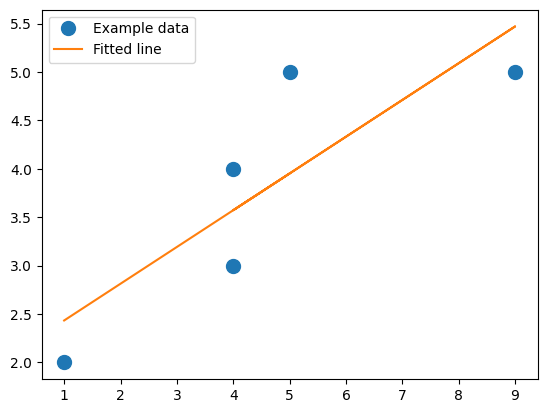

In [8]:
plot_best_fit(x, y, lin_reg.slope, lin_reg.intercept)

## Using numpy Least Squares function

If we wanted to solve a least-squares regression more optimally using only `numpy`, we can use linear algebra and a tool available in `numpy` already. The `numpy` library has a linear algebra submodule and in there is a least-square solution: `numpy.linalg.lstsq`, see [the help page](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html) for their own example.

The result of `np.linalg.lstsq` provides a few useful parameters for the data given, such as the solution itself (slope and intercept) along with average of the squared residuals, matrix rank, etc. Really, we're interested in the first things it returns, the solution (i.e. slope, intercept).

In [9]:
A = np.array([x, np.ones(len(x))]).T # T is shortcut for "transpose()"
lstsq_out = np.linalg.lstsq(A, y, rcond=None) # Finding the least-squares solution to Ax = y

slope, intercept = lstsq_out[0]
print(f"slope = {slope}, intercept = {intercept}")
print(f"sum of residuals, squared (or SSE): {lstsq_out[1]}")
print(f"matrix rank = {lstsq_out[2]}")
print(f"singular values of input (A): {lstsq_out[3]}")

slope = 0.37951807228915657, intercept = 2.0542168674698797
sum of residuals, squared (or SSE): [2.01807229]
matrix rank = 2
singular values of input (A): [11.95147869  1.07803386]


Again, we can plot our results, as we saw before.

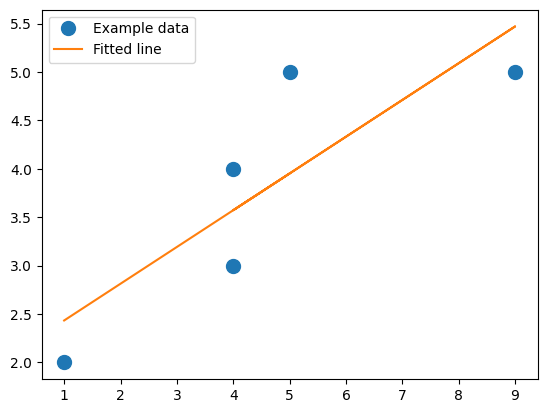

In [10]:
plot_best_fit(x,y, slope, intercept)

## Using statsmodel to tell us everything in the universe

The [statsmodel](https://www.statsmodels.org/stable/) is a swiss army knife for creating and observing statistical models. In a few lines of codes, you can be handed a table of statistical summaries. It can be seen as a merger between the worlds of R and python, and functions primarily with `pandas.DataFrame` objects, similar to R's data frames.

Below we'll run an Oridinary Least Squares regression model on the data, see a table printing a summary on multiple statistics.

In [11]:
from statsmodels.formula.api import ols # Oridinary Least Squares regression
from statsmodels.stats.api import anova_lm # For ANOVA least squares
from pandas import DataFrame

xy_df = DataFrame(data=xy, columns=["height", "weight"]) # statsmodels lives in the world of data frames
ols_fit_results = ols(formula="height ~ weight", data=xy_df).fit()

print(ols_fit_results.summary())

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     7.109
Date:                Mon, 03 Mar 2025   Prob (F-statistic):             0.0759
Time:                        12:52:01   Log-Likelihood:                -8.7905
No. Observations:                   5   AIC:                             21.58
Df Residuals:                       3   BIC:                             20.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4412      2.762     -0.884      0.4

/home/clintc/projects/lab-lessons/python/lessons/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
